In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

In [17]:
df = make_moons(
    n_samples=500,
    noise=0.3,
    random_state=42,
)
X = df[0]
y = df[1]

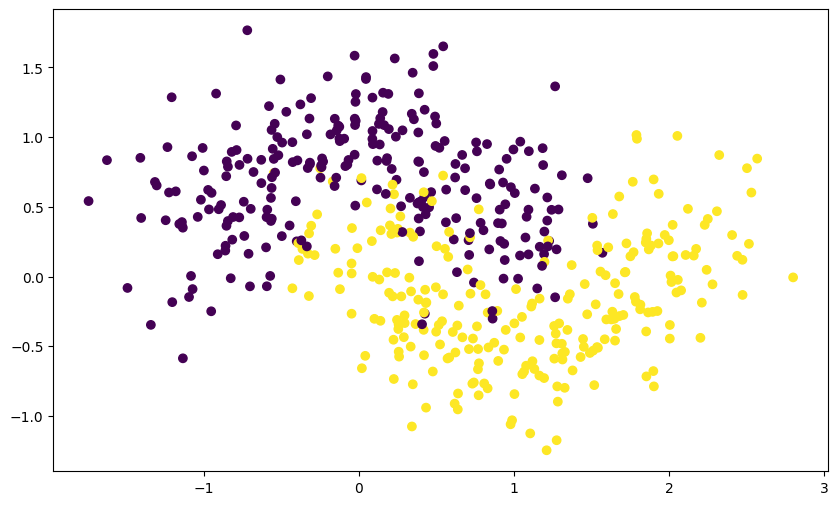

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

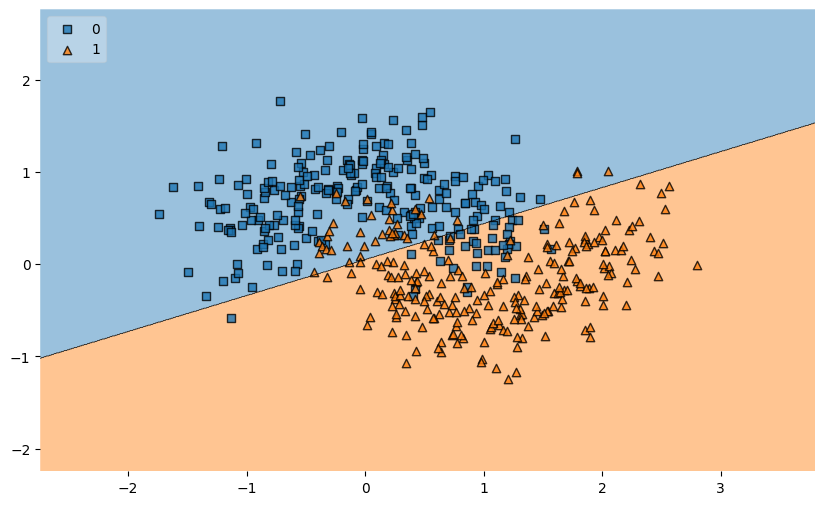

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y.astype('int'), clf, legend = 2)
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, X, y,scoring = 'accuracy', cv = 10))

np.float64(0.8400000000000001)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_trf = poly.fit_transform(X)
X_trf

array([[ 8.31039149e-01, -2.58748754e-01,  6.90626067e-01, ...,
        -1.78698634e-01,  5.56388337e-02, -1.73234665e-02],
       [ 1.18506381e+00,  9.20387143e-01,  1.40437624e+00, ...,
         1.29256984e+00,  1.00388236e+00,  7.79671446e-01],
       [ 1.16402213e+00, -4.55525583e-01,  1.35494753e+00, ...,
        -6.17213261e-01,  2.41538732e-01, -9.45231784e-02],
       ...,
       [ 1.82398104e-01,  2.96612334e-02,  3.32690682e-02, ...,
         9.86801598e-04,  1.60471803e-04,  2.60956200e-05],
       [ 1.26017313e+00, -5.89217041e-01,  1.58803632e+00, ...,
        -9.35698060e-01,  4.37502776e-01, -2.04562440e-01],
       [-2.66492596e-02,  1.58396005e+00,  7.10183039e-04, ...,
         1.12490156e-03, -6.68611116e-02,  3.97404396e+00]],
      shape=(500, 9))

In [25]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1, X_trf, y,scoring='accuracy', cv=10))

np.float64(0.9120000000000001)

In [ ]:
def plot_decision_boundary(X, y, degree=1):
    poly = PolynomialFeatures(degree = degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf, y)

    accuracy = np.mean(cross_val_score(clf, X_trf, y ,scoring='accuracy', cv=10))

    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

    XX, YY = np.meshgrid(a,b)

    input_array = np.array([XX.ravel(),YY.ravel()]).T

    labels = clf.predict(poly.transform(input_array))

    plt.figure(figsize=(10,6))
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

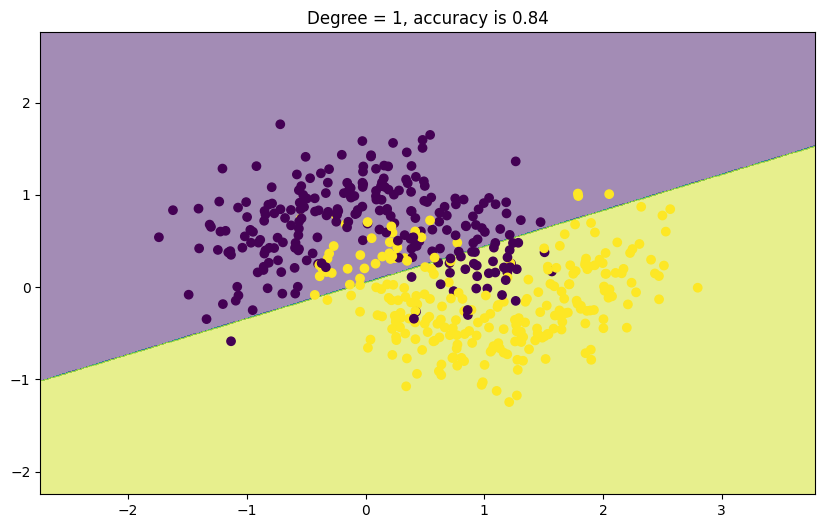

In [27]:
plot_decision_boundary(X, y)

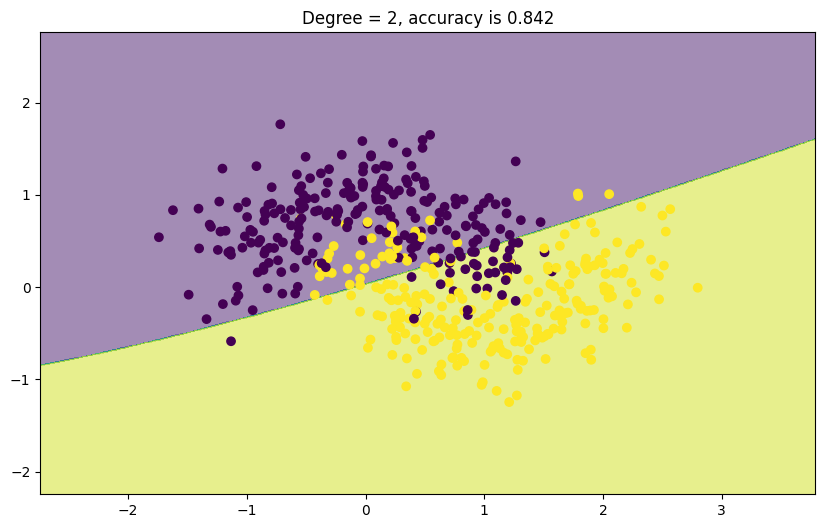

In [28]:
plot_decision_boundary(X, y, degree=2)

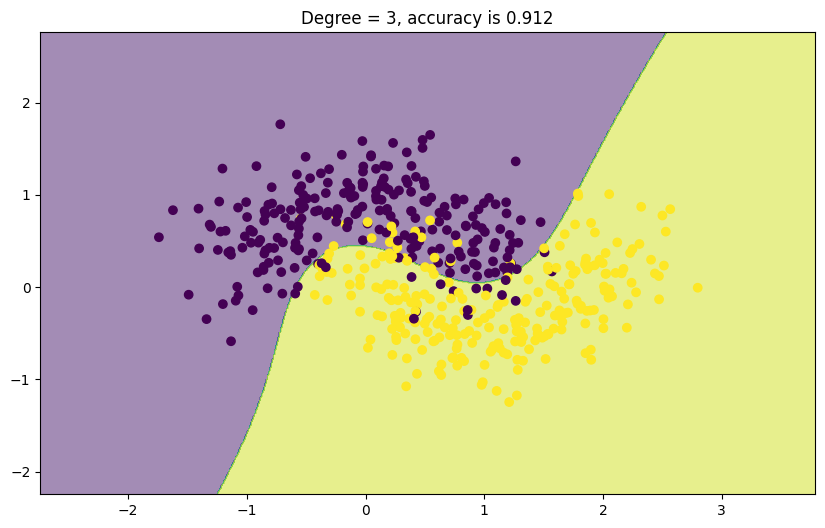

In [29]:
plot_decision_boundary(X, y, degree=3)

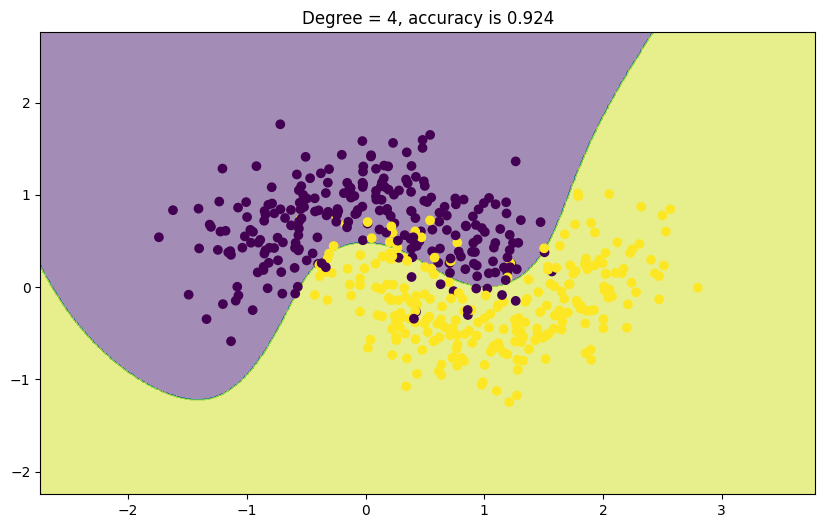

In [30]:
plot_decision_boundary(X, y, degree = 4)

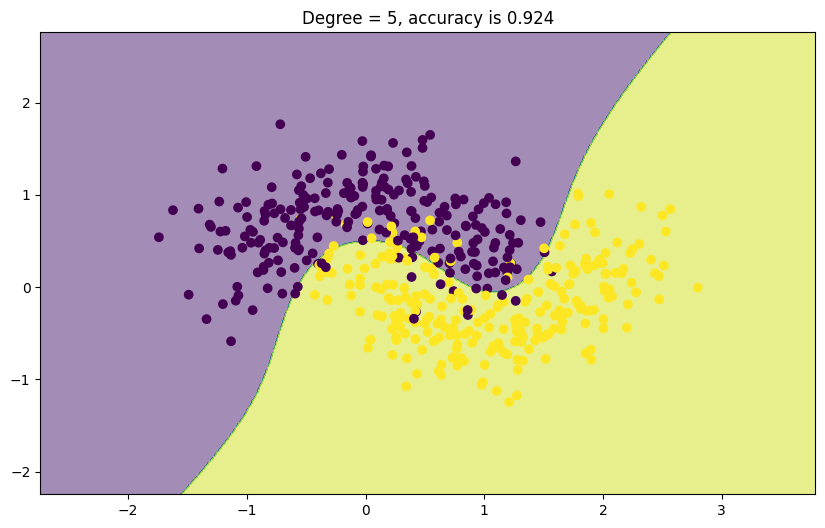

In [31]:
plot_decision_boundary(X, y, degree=5)

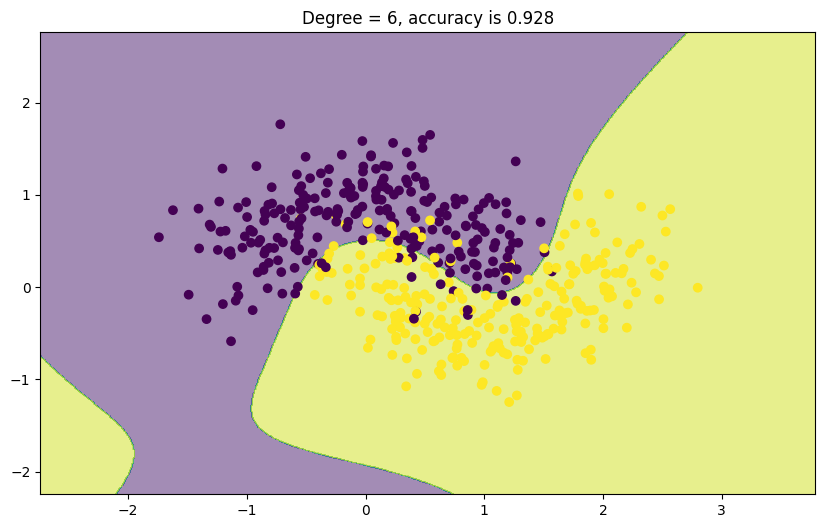

In [32]:
plot_decision_boundary(X, y, degree=6)

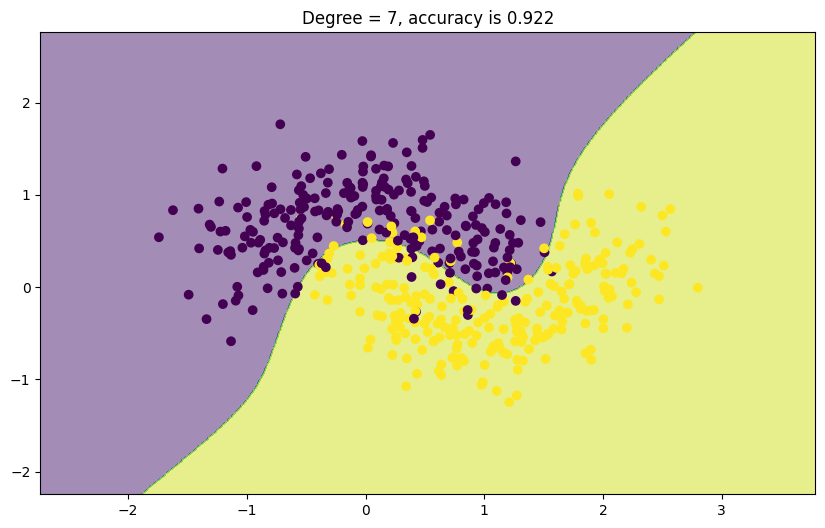

In [33]:
plot_decision_boundary(X, y, degree=7)

> As degree increases the model is `overfitting`.